In [ ]:
!python -m pip install tslearn

     |████████████████████████████████| 798kB 37.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from matplotlib.figure import Figure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = '/content/drive/MyDrive/AIcereals/dataset/'

def read_list_files(path):
    out = os.listdir(PATH)
    #print(out)
    return out

def filename_split(file):
    field = list()
    file_split = file.split('_',2)
    if '-' in file_split[0] :
        fields = [file_split[0].split('-')[len(file_split[0].split('-'))-1],file_split[1],file_split[2].split('.')[0],str(file)]
    else :
        fields = [file_split[0],file_split[1],file_split[2].split('.')[0],str(file)]
    return fields


def file_array():
    out = read_list_files(PATH)
    fields = list()
    for i in range(0,len(out)):
        fields.append(filename_split(out[i]))
    fields_array = np.array(fields)
    return fields_array

def read_file(path):
    df = pd.read_csv(path,header = 0, sep = ' ')
    ar = np.array(df)
    #print(ar[0,:]) #first row
    #print(ar[0,0]) #first element
    return ar



def index_compute(n,fa,band1,band2):
    temp = fa[fa[:,0] == str(n)]
    #print(str(temp[temp[:,1] == str(band1),3][0]))
    a = read_file(PATH + str(temp[temp[:,1] == str(band1),3][0]))
    #print(str(temp[temp[:,1] == str(band2),3][0]))
    b = read_file(PATH + str(temp[temp[:,1] == str(band2),3][0]))
    num = np.empty(a.shape)
    num = a - b
    den = np.empty(a.shape)
    den = b + a
    index = np.empty(a.shape)
    index = num / den
    return index
    
def ndvi_view(fa, FIELD_NUMBER):
    ndvi = index_compute(FIELD_NUMBER, fa, 8, 4)
    #plt.plot(ndvi)
    #plt.show()
    #index_to_csv(ndvi, 'ndvi', FIELD_NUMBER)
    return ndvi

def ndre_view(fa, FIELD_NUMBER):
    ndre = index_compute(FIELD_NUMBER, fa, 8, 5)
    #plt.plot(ndre)
    #plt.show()
    #index_to_csv(ndre, 'ndre', FIELD_NUMBER)
    return ndre

def gndvi_view(fa, FIELD_NUMBER):
    gndvi = index_compute(FIELD_NUMBER, fa, 9, 3)
    #plt.plot(gndvi)
    #plt.show()
    #index_to_csv(gndvi, 'gndvi', FIELD_NUMBER)
    print(gndvi.shape)
    return gndvi
    

def show(fa, FIELD_NUMBER,i):
    figure,axs = plt.subplots(3,1,sharex=True)
    figure.suptitle('Field number: '+ str(FIELD_NUMBER))
    ndvi = ndvi_view(fa, FIELD_NUMBER)
    ndre = ndre_view(fa, FIELD_NUMBER)
    gndvi = gndvi_view(fa, FIELD_NUMBER)
    axs[0].plot(ndvi)
    #axs[0].set_title('NDVI')
    axs[1].plot(ndre)
    #axs[1].set_title('NDRE')
    axs[2].plot(gndvi)
    #axs[2].set_title('GNDVI')
    #plt.savefig("/content/drive/MyDrive/AIcereals/Index_plot/ " + str(FIELD_NUMBER) + '.png')
    if i == 0:
      return ndvi
    elif i == 1:
      return ndre
    elif i == 2:
      return gndvi
    

def index_to_csv(index_name, ind, N):
    df = pd.DataFrame(index_name)
    filename = "/content/drive/MyDrive/AIcereals/Index_csv/ " + str(N) + str("_") + str(ind) + ".csv"
    df.to_csv(filename , index = False)
    #np.savetxt("gndvi.csv", index_name, delimiter=",")

def main_preprocessing(n,I):
    fa = file_array()
    output = show(fa, n, I)
    #ndvi_view(fa)
    #ndre_view(fa)
    #gndvi_view(fa)
    return output



(43, 220)


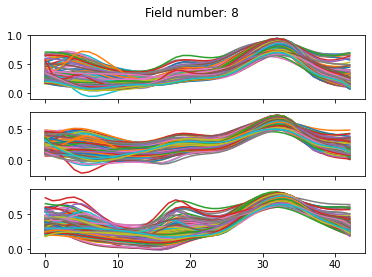

In [ ]:
FIELD = 8
# I = 0 (NDVI), 1 (NDRE), 2 (GNDVI)
I = 2
dataset = main_preprocessing(FIELD,I)

prepara input (Input_dim, Timesteps, 1) + adattamento per rete con padding inizio e fine di 1

Creazione vettore rumore per pred(clustering)

X_train N Pixel:  255
[0 1 0 1 1 2 0 2 0 0 0 2 1 2 2 0 1 1 1 1 0 1 0 0 1 2 0 2 0 1 1 2 0 1 1 1 0
 2 0 2 2 0 2 0 0 0 1 1 2 0 0 1 0 1 2 2 0 1 1 1 1 2 2 2 0 2 1 0 1 2 0 0 2 0
 0 0 0 0 0 2 0 2 1 1 1 0 1 1 1 0 1 2 0 1 2 0 2 0 1 2 2 1 0 1 1 0 2 2 2 2 1
 2 2 2 2 2 0 1 2 2 1 2 1 0 2 2 0 2 0 0 2 0 2 2 2 0 0 0 1 2 0 1 2 2 2 1 0 0
 0 0 2 2 0 0 0 1 2 0 0 1 0 2 1 1 1 0 0 0 1 1 2 1 0 0 1 2 1 1 1 0 0 0 1 2 1
 1 0 0 1 2 0 2 2 1 1 1 2 0 0 1 0 2 2 0 2 2 2 1 1 0 0 0 2 2 1 1 0 0 2 1 1 2
 0 1 1 1 1 1 2 2 2 0 1 2 1 1 1 1 0 2 2 0 1 1 0 0 0 2 1 2 1 2 0 2 0]


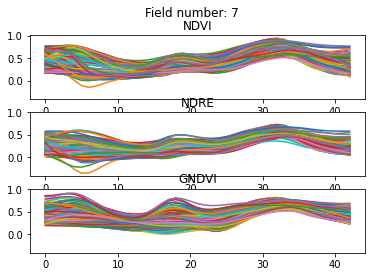

In [ ]:
FIELD = 7
# I = 0 (NDVI), 1 (NDRE), 2 (GNDVI)
I = 2
dataset = main_preprocessing(FIELD,I)
dataset = np.pad(dataset, (1, 1), 'edge')[:,1:-1]
X_train = dataset.T.reshape((dataset.T.shape[0], dataset.T.shape[1], 1))
print("X_train N Pixel: ", X_train.shape[0])
np.random.seed(0) 
y_train = np.random.randint(3, size=X_train.shape[0])
print(y_train)

DEEP TEMPORAL CLUSTERING

In [ ]:
import os
import csv
import argparse
from time import time

# Keras
from keras.models import Model
from keras.layers import Dense, Reshape, UpSampling2D, Conv2DTranspose, GlobalAveragePooling1D, Softmax
from keras.losses import kullback_leibler_divergence
import keras.backend as K

# scikit-learn
from sklearn.cluster import AgglomerativeClustering, KMeans

class DTC:
    """
    Deep Temporal Clustering (DTC) model

    # Arguments
        n_clusters: number of clusters
        input_dim: input dimensionality
        timesteps: length of input sequences (can be None for variable length)
        n_filters: number of filters in convolutional layer
        kernel_size: size of kernel in convolutional layer
        strides: strides in convolutional layer
        pool_size: pooling size in max pooling layer, must divide the time series length
        n_units: numbers of units in the two BiLSTM layers
        alpha: coefficient in Student's kernel
        dist_metric: distance metric between latent sequences
        cluster_init: cluster initialization method

    """

    def __init__(self, n_clusters, input_dim, timesteps,
                 n_filters=50, kernel_size=10, strides=1, pool_size=10, n_units=[50, 1],
                 alpha=1.0, dist_metric='eucl', cluster_init='kmeans', heatmap=True):
        self.n_clusters = n_clusters
        self.input_dim = input_dim
        self.timesteps = timesteps
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.pool_size = pool_size
        self.n_units = n_units
        self.latent_shape = (self.timesteps // self.pool_size, self.n_units[1])
        self.alpha = alpha
        self.dist_metric = dist_metric
        self.cluster_init = cluster_init
        self.heatmap = heatmap
        self.pretrained = False
        self.model = self.autoencoder = self.encoder = self.decoder = None
        if self.heatmap:
            self.heatmap_model = None
            self.heatmap_loss_weight = None
            self.initial_heatmap_loss_weight = None
            self.final_heatmap_loss_weight = None
            self.finetune_heatmap_at_epoch = None

    def initialize(self):
        """
        Create DTC model
        """
        # Create AE models
        self.autoencoder, self.encoder, self.decoder = temporal_autoencoder_v2(input_dim=self.input_dim,
                                                                            timesteps=self.timesteps,
                                                                            n_filters=self.n_filters,
                                                                            kernel_size=self.kernel_size,
                                                                            strides=self.strides,
                                                                            pool_size=self.pool_size,
                                                                            n_units=self.n_units)
        clustering_layer = TSClusteringLayer(self.n_clusters,
                                             alpha=self.alpha,
                                             dist_metric=self.dist_metric,
                                             name='TSClustering')(self.encoder.output)

        # Heatmap-generating network
        if self.heatmap:
            n_heatmap_filters = self.n_clusters  # one heatmap (class activation map) per cluster
            encoded = self.encoder.output
            heatmap_layer = Reshape((-1, 1, self.n_units[1]))(encoded)
            heatmap_layer = UpSampling2D((self.pool_size, 1))(heatmap_layer)
            heatmap_layer = Conv2DTranspose(n_heatmap_filters, (self.kernel_size, 1), padding='same')(heatmap_layer)
            # The next one is the heatmap layer we will visualize
            heatmap_layer = Reshape((-1, n_heatmap_filters), name='Heatmap')(heatmap_layer)
            heatmap_output_layer = GlobalAveragePooling1D()(heatmap_layer)
            # A dense layer must be added only if `n_heatmap_filters` is different from `n_clusters`
            # heatmap_output_layer = Dense(self.n_clusters, activation='relu')(heatmap_output_layer)
            heatmap_output_layer = Softmax()(heatmap_output_layer)  # normalize activations with softmax

        if self.heatmap:
            # Create DTC model
            self.model = Model(inputs=self.autoencoder.input,
                               outputs=[self.autoencoder.output, clustering_layer, heatmap_output_layer])
            # Create Heatmap model
            self.heatmap_model = Model(inputs=self.autoencoder.input,
                                       outputs=heatmap_layer)
        else:
            # Create DTC model
            self.model = Model(inputs=self.autoencoder.input,
                               outputs=[self.autoencoder.output, clustering_layer])

    @property
    def cluster_centers_(self):
        """
        Returns cluster centers
        """
        return self.model.get_layer(name='TSClustering').get_weights()[0]

    @staticmethod
    def weighted_kld(loss_weight):
        """
        Custom KL-divergence loss with a variable weight parameter
        """
        def loss(y_true, y_pred):
            return loss_weight * kullback_leibler_divergence(y_true, y_pred)
        return loss

    def on_epoch_end(self, epoch):
        """
        Update heatmap loss weight on epoch end
        """
        if epoch > self.finetune_heatmap_at_epoch:
            K.set_value(self.heatmap_loss_weight, self.final_heatmap_loss_weight)

    def compile(self, gamma, optimizer, initial_heatmap_loss_weight=None, final_heatmap_loss_weight=None):
        """
        Compile DTC model

        # Arguments
            gamma: coefficient of TS clustering loss
            optimizer: optimization algorithm
            initial_heatmap_loss_weight (optional): initial weight of heatmap loss vs clustering loss
            final_heatmap_loss_weight (optional): final weight of heatmap loss vs clustering loss (heatmap finetuning)
        """
        if self.heatmap:
            self.initial_heatmap_loss_weight = initial_heatmap_loss_weight
            self.final_heatmap_loss_weight = final_heatmap_loss_weight
            self.heatmap_loss_weight = K.variable(self.initial_heatmap_loss_weight)
            self.model.compile(loss=['mse', DTC.weighted_kld(1.0 - self.heatmap_loss_weight), DTC.weighted_kld(self.heatmap_loss_weight)],
                               loss_weights=[1.0, gamma, gamma],
                               optimizer=optimizer)
        else:
            self.model.compile(loss=['mse', 'kld'],
                               loss_weights=[1.0, gamma],
                               optimizer=optimizer)

    def load_weights(self, weights_path):
        """
        Load pre-trained weights of DTC model

        # Arguments
            weight_path: path to weights file (.h5)
        """
        self.model.load_weights(weights_path)
        self.pretrained = True

    def load_ae_weights(self, ae_weights_path):
        """
        Load pre-trained weights of AE

        # Arguments
            ae_weight_path: path to weights file (.h5)
        """
        self.autoencoder.load_weights(ae_weights_path)
        self.pretrained = True

    def dist(self, x1, x2):
        """
        Compute distance between two multivariate time series using chosen distance metric

        # Arguments
            x1: first input (np array)
            x2: second input (np array)
        # Return
            distance
        """
        if self.dist_metric == 'eucl':
            return tsdistances.eucl(x1, x2)
        elif self.dist_metric == 'cid':
            return tsdistances.cid(x1, x2)
        elif self.dist_metric == 'cor':
            return tsdistances.cor(x1, x2)
        elif self.dist_metric == 'acf':
            return tsdistances.acf(x1, x2)
        else:
            raise ValueError('Available distances are eucl, cid, cor and acf!')

    def init_cluster_weights(self, X):
        """
        Initialize with complete-linkage hierarchical clustering or k-means.

        # Arguments
            X: numpy array containing training set or batch
        """
        assert(self.cluster_init in ['hierarchical', 'kmeans'])
        print('Initializing cluster...')

        features = self.encode(X)

        if self.cluster_init == 'hierarchical':
            if self.dist_metric == 'eucl':  # use AgglomerativeClustering off-the-shelf
                hc = AgglomerativeClustering(n_clusters=self.n_clusters,
                                             affinity='euclidean',
                                             linkage='complete').fit(features.reshape(features.shape[0], -1))
            else:  # compute distance matrix using dist
                d = np.zeros((features.shape[0], features.shape[0]))
                for i in range(features.shape[0]):
                    for j in range(i):
                        d[i, j] = d[j, i] = self.dist(features[i], features[j])
                hc = AgglomerativeClustering(n_clusters=self.n_clusters,
                                             affinity='precomputed',
                                             linkage='complete').fit(d)
            # compute centroid
            cluster_centers = np.array([features[hc.labels_ == c].mean(axis=0) for c in range(self.n_clusters)])
        elif self.cluster_init == 'kmeans':
            # fit k-means on flattened features
            km = KMeans(n_clusters=self.n_clusters, n_init=10).fit(features.reshape(features.shape[0], -1))
            cluster_centers = km.cluster_centers_.reshape(self.n_clusters, features.shape[1], features.shape[2])

        self.model.get_layer(name='TSClustering').set_weights([cluster_centers])
        print('Done!')

    def encode(self, x):
        """
        Encoding function. Extract latent features from hidden layer

        # Arguments
            x: data point
        # Return
            encoded (latent) data point
        """
        return self.encoder.predict(x)

    def decode(self, x):
        """
        Decoding function. Decodes encoded sequence from latent space.

        # Arguments
            x: encoded (latent) data point
        # Return
            decoded data point
        """
        return self.decoder.predict(x)

    def predict(self, x):
        """
        Predict cluster assignment.

        """
        q = self.model.predict(x, verbose=0)[1]
        return q.argmax(axis=1)

    @staticmethod
    def target_distribution(q):  # target distribution p which enhances the discrimination of soft label q
        weight = q ** 2 / q.sum(0)
        return (weight.T / weight.sum(1)).T

    def predict_heatmap(self, x):
        """
        Produces TS clustering heatmap from input sequence.

        # Arguments
            x: data point
        # Return
            heatmap
        """
        return self.heatmap_model.predict(x, verbose=0)

    def pretrain(self, X,
                 optimizer='adam',
                 epochs=10,
                 batch_size=64,
                 save_dir='results/tmp',
                 verbose=1):
        """
        Pre-train the autoencoder using only MSE reconstruction loss
        Saves weights in h5 format.

        # Arguments
            X: training set
            optimizer: optimization algorithm
            epochs: number of pre-training epochs
            batch_size: training batch size
            save_dir: path to existing directory where weights will be saved
        """
        print('Pretraining...')
        self.autoencoder.compile(optimizer=optimizer, loss='mse')

        # Begin pretraining
        t0 = time()
        self.autoencoder.fit(X, X, batch_size=batch_size, epochs=epochs, verbose=verbose)
        print('Pretraining time: ', time() - t0)
        self.autoencoder.save_weights('{}/ae_weights-epoch{}.h5'.format(save_dir, epochs))
        print('Pretrained weights are saved to {}/ae_weights-epoch{}.h5'.format(save_dir, epochs))
        self.pretrained = True

    def fit(self, X_train, y_train=None,
            X_val=None, y_val=None,
            epochs=100,
            eval_epochs=10,
            save_epochs=10,
            batch_size=64,
            tol=0.001,
            patience=5,
            finetune_heatmap_at_epoch=8,
            save_dir='results/tmp'):
        """
        Training procedure

        # Arguments
           X_train: training set
           y_train: (optional) training labels
           X_val: (optional) validation set
           y_val: (optional) validation labels
           epochs: number of training epochs
           eval_epochs: evaluate metrics on train/val set every eval_epochs epochs
           save_epochs: save model weights every save_epochs epochs
           batch_size: training batch size
           tol: tolerance for stopping criterion
           patience: patience for stopping criterion
           finetune_heatmap_at_epoch: epoch number where heatmap finetuning will start. Heatmap loss weight will
                                      switch from `self.initial_heatmap_loss_weight` to `self.final_heatmap_loss_weight`
           save_dir: path to existing directory where weights and logs are saved
        """
        if not self.pretrained:
            print('Autoencoder was not pre-trained!')

        if self.heatmap:
            self.finetune_heatmap_at_epoch = finetune_heatmap_at_epoch

        # Logging file
        logfile = open(save_dir + '/dtc_log.csv', 'w')
        fieldnames = ['epoch', 'T', 'L', 'Lr', 'Lc']
        if X_val is not None:
            fieldnames += ['L_val', 'Lr_val', 'Lc_val']
        if y_train is not None:
            fieldnames += ['acc', 'pur', 'nmi', 'ari']
        if y_val is not None:
            fieldnames += ['acc_val', 'pur_val', 'nmi_val', 'ari_val']
        logwriter = csv.DictWriter(logfile, fieldnames)
        logwriter.writeheader()

        y_pred_last = None
        patience_cnt = 0

        print('Training for {} epochs.\nEvaluating every {} and saving model every {} epochs.'.format(epochs, eval_epochs, save_epochs))

        for epoch in range(epochs):

            # Compute cluster assignments for training set
            q = self.model.predict(X_train)[1]
            p = DTC.target_distribution(q)

            # Evaluate losses and metrics on training set
            if epoch % eval_epochs == 0:

                # Initialize log dictionary
                logdict = dict(epoch=epoch)

                y_pred = q.argmax(axis=1)
                if X_val is not None:
                    q_val = self.model.predict(X_val)[1]
                    p_val = DTC.target_distribution(q_val)
                    y_val_pred = q_val.argmax(axis=1)

                print('epoch {}'.format(epoch))
                if self.heatmap:
                    loss = self.model.evaluate(X_train, [X_train, p, p], batch_size=batch_size, verbose=False)
                else:
                    loss = self.model.evaluate(X_train, [X_train, p], batch_size=batch_size, verbose=False)
                logdict['L'] = loss[0]
                logdict['Lr'] = loss[1]
                logdict['Lc'] = loss[2]
                print('[Train] - Lr={:f}, Lc={:f} - total loss={:f}'.format(logdict['Lr'], logdict['Lc'], logdict['L']))
                if X_val is not None:
                    val_loss = self.model.evaluate(X_val, [X_val, p_val], batch_size=batch_size, verbose=False)
                    logdict['L_val'] = val_loss[0]
                    logdict['Lr_val'] = val_loss[1]
                    logdict['Lc_val'] = val_loss[2]
                    print('[Val] - Lr={:f}, Lc={:f} - total loss={:f}'.format(logdict['Lr_val'], logdict['Lc_val'], logdict['L_val']))

                # Evaluate the clustering performance using labels
                if y_train is not None:
                    logdict['acc'] = cluster_acc(y_train, y_pred)
                    logdict['pur'] = cluster_purity(y_train, y_pred)
                    logdict['nmi'] = metrics.normalized_mutual_info_score(y_train, y_pred)
                    logdict['ari'] = metrics.adjusted_rand_score(y_train, y_pred)
                    print('[Train] - Acc={:f}, Pur={:f}, NMI={:f}, ARI={:f}'.format(logdict['acc'], logdict['pur'],
                                                                                    logdict['nmi'], logdict['ari']))
                if y_val is not None:
                    logdict['acc_val'] = cluster_acc(y_val, y_val_pred)
                    logdict['pur_val'] = cluster_purity(y_val, y_val_pred)
                    logdict['nmi_val'] = metrics.normalized_mutual_info_score(y_val, y_val_pred)
                    logdict['ari_val'] = metrics.adjusted_rand_score(y_val, y_val_pred)
                    print('[Val] - Acc={:f}, Pur={:f}, NMI={:f}, ARI={:f}'.format(logdict['acc_val'], logdict['pur_val'],
                                                                                  logdict['nmi_val'], logdict['ari_val']))

                logwriter.writerow(logdict)

                # check stop criterion
                if y_pred_last is not None:
                    assignment_changes = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
                y_pred_last = y_pred
                if epoch > 0 and assignment_changes < tol:
                    patience_cnt += 1
                    print('Assignment changes {} < {} tolerance threshold. Patience: {}/{}.'.format(assignment_changes, tol, patience_cnt, patience))
                    if patience_cnt >= patience:
                        print('Reached max patience. Stopping training.')
                        logfile.close()
                        break
                else:
                    patience_cnt = 0

            # Save intermediate model and plots
            if epoch % save_epochs == 0:
                self.model.save_weights(save_dir + '/DTC_model_' + str(epoch) + '.h5')
                print('Saved model to:', save_dir + '/DTC_model_' + str(epoch) + '.h5')

            # Train for one epoch
            if self.heatmap:
                self.model.fit(X_train, [X_train, p, p], epochs=1, batch_size=batch_size, verbose=False)
                self.on_epoch_end(epoch)
            else:
                self.model.fit(X_train, [X_train, p], epochs=1, batch_size=batch_size, verbose=False)

        # Save the final model
        logfile.close()
        print('Saving model to:', save_dir + '/DTC_model_final.h5')
        self.model.save_weights(save_dir + '/DTC_model_final.h5')

METRICHE


In [ ]:
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.preprocessing import label_binarize

def cluster_acc(y_true, y_pred):
    """
    Calculate unsupervised clustering accuracy. Requires scikit-learn installed
    # Arguments
        y_true: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return w[row_ind, col_ind].sum() * 1.0 / y_pred.size


def cluster_purity(y_true, y_pred):
    """
    Calculate clustering purity
    # Arguments
        y_true: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        purity, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    label_mapping = w.argmax(axis=1)
    y_pred_voted = y_pred.copy()
    for i in range(y_pred.size):
        y_pred_voted[i] = label_mapping[y_pred[i]]
    return metrics.accuracy_score(y_pred_voted, y_true)


def roc_auc(y_true, q_pred, n_classes):
    """
    Calculate area under ROC curve (ROC AUC)
    WARNING: DO NOT USE, MAY CONTAIN ERRORS
    TODO: CHECK IT!
    # Arguments
        y_true: true labels, numpy.array with shape `(n_samples,)`
        q_pred: predicted probabilities, numpy.array with shape `(n_samples,)`
    # Return
        ROC AUC score, in [0,1]
    """
    if n_classes == 2:  # binary ROC AUC
        auc = max(metrics.roc_auc_score(y_true, q_pred[:, 1]), metrics.roc_auc_score(y_true, q_pred[:, 0]))
    else:  # micro-averaged ROC AUC (multiclass)
        fpr, tpr, _ = metrics.roc_curve(label_binarize(y_true, classes=np.unique(y_true)).ravel(), q_pred.ravel())
        auc = metrics.auc(fpr, tpr)
    return auc

CLASS LAYER TSC

In [ ]:
from keras.engine.topology import Layer, InputSpec
import keras.backend as K


class TSClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, timesteps, n_features)` witch represents the initial cluster centers.
        alpha: parameter in Student's t-distribution. Default to 1.0.
        dist_metric: distance metric between sequences used in similarity kernel ('eucl', 'cir', 'cor' or 'acf').
    # Input shape
        3D tensor with shape: `(n_samples, timesteps, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, dist_metric='eucl', **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(TSClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.dist_metric = dist_metric
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=3)
        self.clusters = None
        self.built = False

    def build(self, input_shape):
        assert len(input_shape) == 3
        input_dim = input_shape[2]
        input_steps = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_steps, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_steps, input_dim), initializer='glorot_uniform', name='cluster_centers')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """
        Student t-distribution kernel, probability of assigning encoded sequence i to cluster k.
            q_{ik} = (1 + dist(z_i, m_k)^2)^{-1} / normalization.
        Arguments:
            inputs: encoded input sequences, shape=(n_samples, timesteps, n_features)
        Return:
            q: soft labels for each sample. shape=(n_samples, n_clusters)
        """
        if self.dist_metric == 'eucl':
            distance = K.sum(K.sqrt(K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2)), axis=-1)
        elif self.dist_metric == 'cid':
            ce_x = K.sqrt(K.sum(K.square(inputs[:, 1:, :] - inputs[:, :-1, :]), axis=1))  # shape (n_samples, n_features)
            ce_w = K.sqrt(K.sum(K.square(self.clusters[:, 1:, :] - self.clusters[:, :-1, :]), axis=1))  # shape (n_clusters, n_features)
            ce = K.maximum(K.expand_dims(ce_x, axis=1), ce_w) / K.minimum(K.expand_dims(ce_x, axis=1), ce_w)  # shape (n_samples, n_clusters, n_features)
            ed = K.sqrt(K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2))  # shape (n_samples, n_clusters, n_features)
            distance = K.sum(ed * ce, axis=-1)  # shape (n_samples, n_clusters)
        elif self.dist_metric == 'cor':
            inputs_norm = (inputs - K.expand_dims(K.mean(inputs, axis=1), axis=1)) / K.expand_dims(K.std(inputs, axis=1), axis=1)  # shape (n_samples, timesteps, n_features)
            clusters_norm = (self.clusters - K.expand_dims(K.mean(self.clusters, axis=1), axis=1)) / K.expand_dims(K.std(self.clusters, axis=1), axis=1)  # shape (n_clusters, timesteps, n_features)
            pcc = K.mean(K.expand_dims(inputs_norm, axis=1) * clusters_norm, axis=2)  # Pearson correlation coefficients
            distance = K.sum(K.sqrt(2.0 * (1.0 - pcc)), axis=-1)  # correlation-based similarities, shape (n_samples, n_clusters)
        elif self.dist_metric == 'acf':
            raise NotImplementedError
        else:
            raise ValueError('Available distances are eucl, cid, cor and acf!')
        q = 1.0 / (1.0 + K.square(distance) / self.alpha)
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 3
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters, 'dist_metric': self.dist_metric}
        base_config = super(TSClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

TIME SERIES DISTANCES

In [ ]:
import numpy as np
from statsmodels.tsa import stattools
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


def eucl(x, y):
    """
    Euclidean distance between two multivariate time series given as arrays of shape (timesteps, dim)
    """
    d = np.sqrt(np.sum(np.square(x - y), axis=0))
    return np.sum(d)


def cid(x, y):
    """
    Complexity-Invariant Distance (CID) between two multivariate time series given as arrays of shape (timesteps, dim)
    Reference: Batista, Wang & Keogh (2011). A Complexity-Invariant Distance Measure for Time Series. https://doi.org/10.1137/1.9781611972818.60
    """
    assert(len(x.shape) == 2 and x.shape == y.shape)  # time series must have same length and dimensionality
    ce_x = np.sqrt(np.sum(np.square(np.diff(x, axis=0)), axis=0) + 1e-9)
    ce_y = np.sqrt(np.sum(np.square(np.diff(y, axis=0)), axis=0) + 1e-9)
    d = np.sqrt(np.sum(np.square(x - y), axis=0)) * np.divide(np.maximum(ce_x, ce_y), np.minimum(ce_x, ce_y))
    return np.sum(d)


def cor(x, y):
    """
    Correlation-based distance (COR) between two multivariate time series given as arrays of shape (timesteps, dim)
    """
    scaler = TimeSeriesScalerMeanVariance()
    x_norm = scaler.fit_transform(x)
    y_norm = scaler.fit_transform(y)
    pcc = np.mean(x_norm * y_norm)  # Pearson correlation coefficients
    d = np.sqrt(2.0 * (1.0 - pcc + 1e-9))  # correlation-based similarities
    return np.sum(d)


def acf(x, y):
    """
    Autocorrelation-based distance (ACF) between two multivariate time series given as arrays of shape (timesteps, dim)
    Computes a linearly weighted euclidean distance between the autocorrelation coefficients of the input time series.
    Reference: Galeano & Pena (2000). Multivariate Analysis in Vector Time Series.
    """
    assert (len(x.shape) == 2 and x.shape == y.shape)  # time series must have same length and dimensionality
    x_acf = np.apply_along_axis(lambda z: stattools.acf(z, nlags=z.shape[0]), 0, x)
    y_acf = np.apply_along_axis(lambda z: stattools.acf(z, nlags=z.shape[0]), 0, y)
    weights = np.linspace(1.0, 0.0, x.shape[0])
    d = np.sqrt(np.sum(np.expand_dims(weights, axis=1) * np.square(x_acf - y_acf), axis=0))
    return np.sum(d)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, LeakyReLU, MaxPool1D, CuDNNLSTM, Bidirectional, TimeDistributed, Dense, Reshape
from keras.layers import UpSampling2D, Conv2DTranspose


def temporal_autoencoder(input_dim, timesteps, n_filters=50, kernel_size=10, strides=1, pool_size=10, n_units=[50, 1]):
    """
    Temporal Autoencoder (TAE) model with Convolutional and BiLSTM layers.
    # Arguments
        input_dim: input dimension
        timesteps: number of timesteps (can be None for variable length sequences)
        n_filters: number of filters in convolutional layer
        kernel_size: size of kernel in convolutional layer
        strides: strides in convolutional layer
        pool_size: pooling size in max pooling layer, must divide time series length
        n_units: numbers of units in the two BiLSTM layers
        alpha: coefficient in Student's kernel
        dist_metric: distance metric between latent sequences
    # Return
        (ae_model, encoder_model, decoder_model): AE, encoder and decoder models
    """

    # Input
    x = Input(shape=(timesteps, input_dim), name='input_seq')

    # Encoder
    encoded = Conv1D(n_filters, kernel_size, strides=strides, padding='same', activation='linear')(x)
    encoded = LeakyReLU()(encoded)
    encoded = MaxPool1D(pool_size)(encoded)
    encoded = Bidirectional(CuDNNLSTM(n_units[0], return_sequences=True), merge_mode='sum')(encoded)
    encoded = LeakyReLU()(encoded)
    encoded = Bidirectional(CuDNNLSTM(n_units[1], return_sequences=True), merge_mode='sum')(encoded)
    encoded = LeakyReLU(name='latent')(encoded)

    # Decoder
    decoded = Reshape((-1, 1, n_units[1]), name='reshape')(encoded)
    decoded = UpSampling2D((pool_size, 1), name='upsampling')(decoded)  #decoded = UpSampling1D(pool_size, name='upsampling')(decoded)
    decoded = Conv2DTranspose(input_dim, (kernel_size, 1), padding='same', name='conv2dtranspose')(decoded)
    output = Reshape((-1, input_dim), name='output_seq')(decoded)  #output = Conv1D(1, kernel_size, strides=strides, padding='same', activation='linear', name='output_seq')(decoded)

    # AE model
    autoencoder = Model(inputs=x, outputs=output, name='AE')

    # Encoder model
    encoder = Model(inputs=x, outputs=encoded, name='encoder')

    # Create input for decoder model
    encoded_input = Input(shape=(timesteps // pool_size, n_units[1]), name='decoder_input')

    # Internal layers in decoder
    decoded = autoencoder.get_layer('reshape')(encoded_input)
    decoded = autoencoder.get_layer('upsampling')(decoded)
    decoded = autoencoder.get_layer('conv2dtranspose')(decoded)
    decoder_output = autoencoder.get_layer('output_seq')(decoded)

    # Decoder model
    decoder = Model(inputs=encoded_input, outputs=decoder_output, name='decoder')

    return autoencoder, encoder, decoder


def temporal_autoencoder_v2(input_dim, timesteps, n_filters=50, kernel_size=10, strides=1, pool_size=10, n_units=[50, 1]):
    """
    Temporal Autoencoder (TAE) model with Convolutional and BiLSTM layers.
    # Arguments
        input_dim: input dimension
        timesteps: number of timesteps (can be None for variable length sequences)
        n_filters: number of filters in convolutional layer
        kernel_size: size of kernel in convolutional layer
        strides: strides in convolutional layer
        pool_size: pooling size in max pooling layer
        n_units: numbers of units in the two BiLSTM layers
        alpha: coefficient in Student's kernel
        dist_metric: distance metric between latent sequences
    # Return
        (ae_model, encoder_model, decoder_model): AE, encoder and decoder models
    """

    # Input
    x = Input(shape=(timesteps, input_dim), name='input_seq')

    # Encoder
    encoded = Conv1D(n_filters, kernel_size, strides=strides, padding='same', activation='linear')(x)
    encoded = LeakyReLU()(encoded)
    encoded = MaxPool1D(pool_size)(encoded)
    encoded = Bidirectional(CuDNNLSTM(n_units[0], return_sequences=True), merge_mode='concat')(encoded)
    encoded = LeakyReLU()(encoded)
    encoded = Bidirectional(CuDNNLSTM(n_units[1], return_sequences=True), merge_mode='concat')(encoded)
    encoded = LeakyReLU(name='latent')(encoded)

    # Decoder
    decoded = TimeDistributed(Dense(units=n_filters), name='dense')(encoded)
    decoded = LeakyReLU(name='act')(decoded)
    decoded = Reshape((-1, 1, n_filters), name='reshape')(decoded)
    decoded = UpSampling2D((pool_size, 1), name='upsampling')(decoded)
    decoded = Conv2DTranspose(input_dim, (kernel_size, 1), padding='same', name='conv2dtranspose')(decoded)
    output = Reshape((-1, input_dim), name='output_seq')(decoded)

    # AE model
    autoencoder = Model(inputs=x, outputs=output, name='AE')

    # Encoder model
    encoder = Model(inputs=x, outputs=encoded, name='encoder')

    # Create input for decoder model
    encoded_input = Input(shape=(timesteps // pool_size, 2 * n_units[1]), name='decoder_input')
    # Internal layers in decoder
    decoded = autoencoder.get_layer('dense')(encoded_input)
    decoded = autoencoder.get_layer('act')(decoded)
    decoded = autoencoder.get_layer('reshape')(decoded)
    decoded = autoencoder.get_layer('upsampling')(decoded)
    decoded = autoencoder.get_layer('conv2dtranspose')(decoded)
    decoder_output = autoencoder.get_layer('output_seq')(decoded)

    # Decoder model
    decoder = Model(inputs=encoded_input, outputs=decoder_output, name='decoder')

    return autoencoder, encoder, decoder

Fit della rete

In [ ]:
indices = {0 : "NDVI",
           1 : "NDRE",
           2 : "GNDVI",
}

Field:8 GNDVI K:3
X_train N Pixel:  220
[0 1 0 1 1 2 0 2 0 0 0 2 1 2 2 0 1 1 1 1 0 1 0 0 1 2 0 2 0 1 1 2 0 1 1 1 0
 2 0 2 2 0 2 0 0 0 1 1 2 0 0 1 0 1 2 2 0 1 1 1 1 2 2 2 0 2 1 0 1 2 0 0 2 0
 0 0 0 0 0 2 0 2 1 1 1 0 1 1 1 0 1 2 0 1 2 0 2 0 1 2 2 1 0 1 1 0 2 2 2 2 1
 2 2 2 2 2 0 1 2 2 1 2 1 0 2 2 0 2 0 0 2 0 2 2 2 0 0 0 1 2 0 1 2 2 2 1 0 0
 0 0 2 2 0 0 0 1 2 0 0 1 0 2 1 1 1 0 0 0 1 1 2 1 0 0 1 2 1 1 1 0 0 0 1 2 1
 1 0 0 1 2 0 2 2 1 1 1 2 0 0 1 0 2 2 0 2 2 2 1 1 0 0 0 2 2 1 1 0 0 2 1]


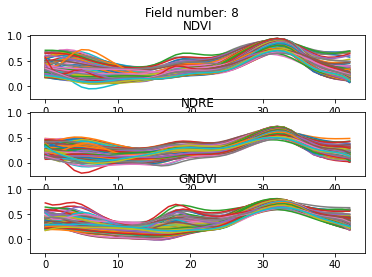

In [ ]:
FIELD = 8
I = 2 #index
CLUSTER = 3
dataset = main_preprocessing(FIELD,I)
dataset = np.pad(dataset, (1, 1), 'edge')[:,1:-1]
X_train = dataset.T.reshape((dataset.T.shape[0], dataset.T.shape[1], 1))
print("Field:"+ str(FIELD) + " " + str(indices[I]) + " K:" + str(CLUSTER))
print("X_train N Pixel: ", X_train.shape[0])
np.random.seed(0) 
y_train = np.random.randint(3, size=X_train.shape[0])
print(y_train)


In [ ]:
# Set default values
pretrain_optimizer = 'adam'

(X_val, y_val) = (None, None)  # no train/validation split for now

if not os.path.exists('/content/drive/MyDrive/AIcereals/results/tmp'):
  os.makedirs('/content/drive/MyDrive/AIcereals/results/tmp')
# Instantiate model
dtc = DTC(n_clusters=CLUSTER,
          input_dim=X_train.shape[-1],
          timesteps=X_train.shape[1],
          n_filters=50,
          kernel_size=10,
          strides=1,
          pool_size=5,
          n_units=[50, 1],
          alpha=1.0,
          dist_metric='eucl',
          cluster_init='kmeans',
          heatmap=True)

# Initialize model
optimizer = 'adam'
dtc.initialize()
dtc.model.summary()
dtc.compile(gamma=1.0, optimizer=optimizer, initial_heatmap_loss_weight=0.1,
            final_heatmap_loss_weight=0.9)

# Initialize clusters
dtc.init_cluster_weights(X_train)

# Fit model
t0 = time()
dtc.fit(X_train, y_train, X_val, y_val, 300, 1, 50, 64,
        0.001, 40, 8, '/content/drive/MyDrive/AIcereals/results/tmp')
print('Training time: ', (time() - t0))

# Evaluate
print('Performance (TRAIN)')
results = {}
q = dtc.model.predict(X_train)[1]
y_pred = q.argmax(axis=1)
if y_train is not None:
    results['acc'] = cluster_acc(y_train, y_pred)
    results['pur'] = cluster_purity(y_train, y_pred)
    results['nmi'] = metrics.normalized_mutual_info_score(y_train, y_pred)
    results['ari'] = metrics.adjusted_rand_score(y_train, y_pred)
print(results)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_seq (InputLayer)          [(None, 45, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 45, 50)       550         input_seq[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_2 (LeakyReLU)       (None, 45, 50)       0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 9, 50)        0           leaky_re_lu_2[0][0]              
____________________________________________________________________________________________

In [ ]:
y_pred

array([2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0])

y_pred shape: (220, 1)
Field:8 - K:3
File salvato correttamente


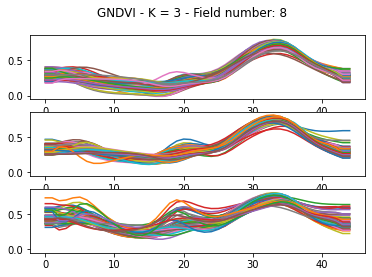

In [ ]:

figure,axs = plt.subplots(3,1,sharey=True)
figure.suptitle(str(indices[I]) + ' - K = 3 - Field number: '+ str(FIELD))
axs[0].plot(dataset.T[np.where(y_pred ==0),:][0, :, :].T)
axs[1].plot(dataset.T[np.where(y_pred ==1),:][0, :, :].T)
axs[2].plot(dataset.T[np.where(y_pred ==2),:][0, :, :].T)
plt.savefig("/content/drive/MyDrive/AIcereals/Cluster/ " + 'Field: ' +str(FIELD) + ' - Index: '+ str(indices[I]) + ' - K: ' +str(CLUSTER)+ '.png')
v = np.reshape(y_pred, (y_pred.shape[0],1))
print("y_pred shape: " + str(v.shape))
print("Field:" + str(FIELD) + " - K:" + str (CLUSTER))
df0 = pd.DataFrame(v)
filename = "/content/drive/MyDrive/AIcereals/Cluster/" + str(indices[I]) + " - Field:" + str(FIELD) + " - K: " + str (CLUSTER) + " .csv"
df0.to_csv(filename , index = False, header= False)
print("File salvato correttamente")